In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import featuretools as ft

In [3]:
#import data
raw_data=pd.read_csv('bikesharing_train.csv')

In [4]:
#get a first galnce at data
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#get info on data types and null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


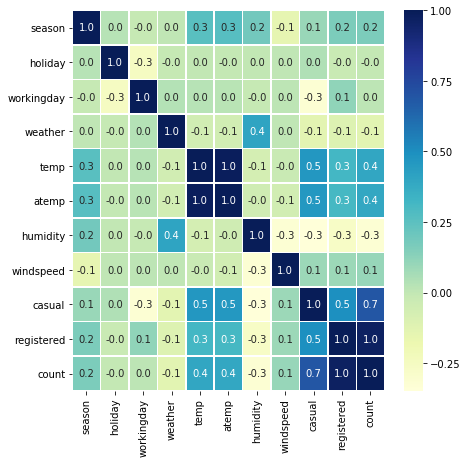

In [6]:
#check correlation between variables
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(raw_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu")
plt.show()

Observations: 1) There is stronger correlation between temp and casual rides that registered rides. That is likely due to the fact that registered users mainly use bike sharing to commute to work, whereas casual users use it more often for leisure when the weather is good. 2) humidity negatively affects number of both registered and casual rides. 3) as expected, there is negative correlation between casual rides and working days

# Treating missing values and outliers

In [7]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


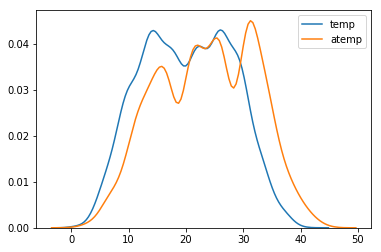

In [8]:
#plotting temp and atemp distributions
sns.kdeplot(raw_data.temp, label='temp')
sns.kdeplot(raw_data.atemp, label='atemp')

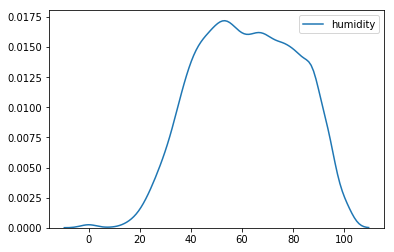

In [9]:
#plotting humidity distribution
sns.kdeplot(raw_data.humidity, label='humidity')

We observe that there are several entries with zero humidity and that is not possible on Earth. 

In [10]:
#check entries with zero humidity
raw_data[(raw_data.humidity==0)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


In [11]:
#we observe that all missing values are on March 10, 2011. Check total number of entries with zero humidity
raw_data[(raw_data.humidity==0)].humidity.count()

22

In [12]:
#as there are only 22 entries out of 11k, we will simply replace zero values with average of the sample
raw_data['humidity'] = raw_data['humidity'].map( lambda x : raw_data.humidity.mean() if x == 0 else x)

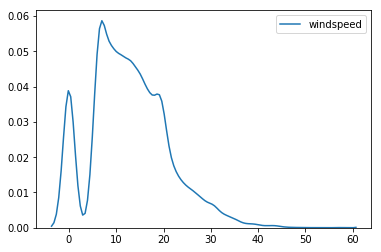

In [13]:
#plotting windspeed distribution
sns.kdeplot(raw_data.windspeed, label='windspeed')

A-ha, there is a spike in zero winspeed, and that likely indicates that those values were simply omited. 

In [14]:
#check total number of entries with zero windspeed
raw_data[(raw_data.windspeed==0)].windspeed.count()

1313

In almost 20% of entries windpeed is omited - we need to fill them with appropriate values. Simple google search suggests that windpeed is correlated with temperature. Thus we will replace zero windspeed values with average for each observed temperature. 

In [15]:
#Replace nan windspeed with last non-zero digit.
raw_data['windspeed']=raw_data['windspeed'].replace(to_replace=0, method='ffill')

In [16]:
raw_data[(raw_data.windspeed==0)].windspeed.count()

5

In [17]:
#create first checkpoint
df1=raw_data.copy()

# Hypothesis 1: number of rides varies by hour and month

In [18]:
#import libraries to extract day of the week from date
import datetime
import calendar

#convert date from type object to type datetime
df1['Date']=pd.to_datetime(df1['datetime'])

#extract hour and month
df1['hour'] = df1['Date'].dt.hour
df1['month'] = df1['Date'].dt.month

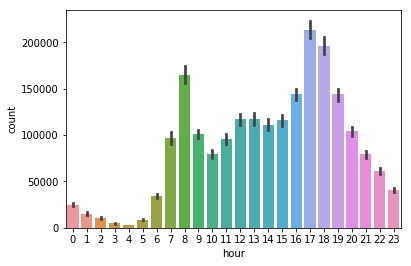

In [19]:
#show distrubution of rides by hour
ax = sns.barplot(x="hour", y="count", data=df1, estimator=sum)

Quite expectedly we observe peaks around 7-9AM and 17-19PM, which indicates, that many passengers use bicycles for commuting. Let us check how proportion of casual/registered users change. 

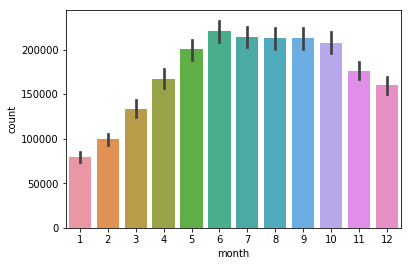

In [20]:
#show distrubution of rides by month
ax = sns.barplot(x="month", y="count", data=df1, estimator=sum)

In [21]:
#confirm that there are 3 months in each season and there is no mistake

pivot_month_season = pd.pivot_table(df1, index=["season"], values=["month"], aggfunc=pd.Series.nunique).reset_index()
pivot_month_season

,season,month
0,1,3
1,2,3
2,3,3
3,4,3


In [22]:
#adding the (sine, cosine) tansformation to season
df1['season_sin'] = np.sin(df1.season*(2.*np.pi/24))
df1['season_cos'] = np.cos(df1.season*(2.*np.pi/24))

Text(0.5,1,'Bike rides by hour')

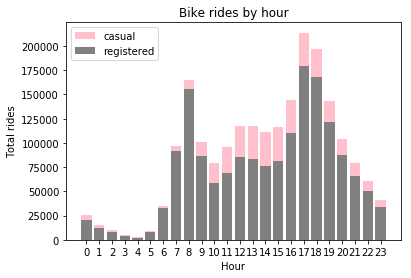

In [23]:
#creating pivot for each hour with number of casual and registered rides
pivot_total = pd.pivot_table(df1,index=["hour"], values=["casual", "registered"], aggfunc=sum).reset_index()

#creating chart with number of casual and registered rides per hour
hours = pivot_total.hour
casual = pivot_total.casual
registered = pivot_total.registered
ind = [x for x, _ in enumerate(hours)]

plt.bar(ind, casual, width=0.8, label='casual', color='pink', bottom=registered)
plt.bar(ind, registered, width=0.8, label='registered', color='gray')

plt.xticks(ind, hours)
plt.ylabel("Total rides")
plt.xlabel("Hour")
plt.legend(loc="upper left")
plt.title("Bike rides by hour")

We observe that share of casual rides is higher during off-peak hours, which again proves that many passengers use bicycles to commute to/from work.

From here on we observe a clear pattern. Between 12 pm and 4 am the average number of registered rides is 80%. Surprisingly share of registered rides spikes already at 5am to 93%, where it stands at around 93-94% till 9am. At 9am share of registered rides goes down to 86% and at 10am to 74%; where it holds at ~70% till 16pm. At 16pm it goes up to 76% and at 17pm to 84%, where it stands at 83-84% till 23pm.

The problem with cyclical values (such as hours) is that using one hot/binary encoding or simply leaving hour value as is will not bring precise results. One possible solution is adding the (sine, cosine) transformation of the time of day variable. This will ensure that for example the 0 and 23 hour are close to each other, thus allowing the cyclical nature of the variable to shine through.

In [24]:
#convert hour, month to numeric type
df1.hour=pd.to_numeric(df1.hour)
df1.month=pd.to_numeric(df1.month)

In [25]:
#adding the (sine, cosine) tansformation to hours, days of the week, months
df1['hour_sin'] = np.sin(df1.hour*(2.*np.pi/24))
df1['hour_cos'] = np.cos(df1.hour*(2.*np.pi/24))

df1['month_sin'] = np.sin(df1.month*(2.*np.pi/24))
df1['month_cos'] = np.cos(df1.month*(2.*np.pi/24))

# Hypothesis 2: number of rides varies on working and non-working days.

Most probably there are more registered rides on workdays and fewer on weekeends/holidays. As for casual rides, they are likely more common on holidays/weekends. However, most probably number of rides also varies every day.

In [26]:
#create checkpoint
df2=df1.copy()

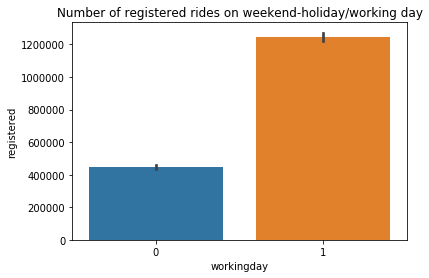

In [27]:
#compare number of registered rides on non-working vs working days
ax = sns.barplot(x="workingday", y="registered", data=df2, estimator=sum).set_title('Number of registered rides on weekend-holiday/working day')

Quite expectly we observe that there were more registered rides on workdays, than on non-working days. Yet, we need to compare apples to apples and check average hourly number of rides.

In [28]:
#creating pivot for workday/non-working day with average number of registered rides
pivot_registered_workday = pd.pivot_table(df2,index=["workingday"], values=["registered"]).reset_index()
pivot_registered_workday

,workingday,registered
0,0,129.198330
1,1,167.904209


I expected that registered users were much less likely to use bike sharing on weekends, yet it turns out that on weekends/holidays number of hourly registered rides went down only by 23%.

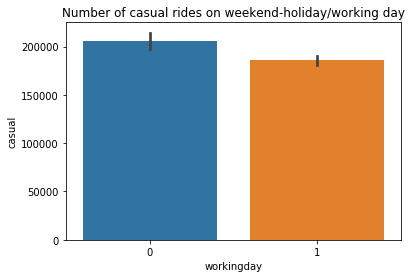

In [29]:
#compare number of casual rides on non-working vs working days
ax = sns.barplot(x="workingday", y="casual", data=df2, estimator=sum).set_title('Number of casual rides on weekend-holiday/working day')

In [30]:
#creating pivot for workday/non-working day with average number of casual rides
pivot_casual_workday = pd.pivot_table(df2,index=["workingday"], values=["casual"]).reset_index()
pivot_casual_workday

,workingday,casual
0,0,59.308290
1,1,25.107663


Her, as expected, number of hourly casual rides is much higher (more than twice) on days off.

Hypothesis 2 was confirmed: number of hourly resgistered rides goes down by 23% on days off and number of causal rides goes up by 136% on days off. 

In [31]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,Date,hour,month,season_sin,season_cos,hour_sin,hour_cos,month_sin,month_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,...,16,2011-01-01 00:00:00,0,1,0.258819,0.965926,0.000000,1.000000,0.258819,0.965926
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,...,40,2011-01-01 01:00:00,1,1,0.258819,0.965926,0.258819,0.965926,0.258819,0.965926
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,...,32,2011-01-01 02:00:00,2,1,0.258819,0.965926,0.500000,0.866025,0.258819,0.965926
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,...,13,2011-01-01 03:00:00,3,1,0.258819,0.965926,0.707107,0.707107,0.258819,0.965926
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,...,1,2011-01-01 04:00:00,4,1,0.258819,0.965926,0.866025,0.500000,0.258819,0.965926


# Hypothesis 3: number of rides varies by day of the week.

Let us check if rides vary significantly by day of the week.

In [32]:
#extracting day of the week from new "Date" column and putting it in a new "Day of the week" column
df2["Day of the week"]=df2['Date'].dt.weekday_name

In [33]:
#creating pivot for each day of the week with average number of  rides
pivot_rides_weekday = pd.pivot_table(df2,index=["Day of the week"], values=["casual", "registered", "count"], aggfunc=sum).reset_index()

#mapping days of the week to their order
pivot_rides_weekday['Day of the week #']=pivot_rides_weekday['Day of the week'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

#renaming days of the week for convenient chart use
pivot_rides_weekday['Day of the week']=pivot_rides_weekday['Day of the week'].map({'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed', 'Thursday':'Thu', 'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'})

#sorting table by day of the week
pivot_rides_weekday=pivot_rides_weekday.sort_values('Day of the week #')

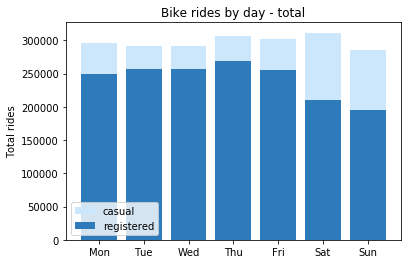

In [34]:
#creating chart with number of casual and registered rides per day of the week

days = pivot_rides_weekday['Day of the week']
casual = pivot_rides_weekday.casual
registered = pivot_rides_weekday.registered

plt.bar(days, casual, width=0.8, label='casual', color='#CCE6FB', bottom=registered)
plt.bar(days, registered, width=0.8, label='registered', color='#2E7BBC')

plt.xticks(days)
plt.title("Bike rides by day - total")
plt.ylabel("Total rides")
plt.legend(loc="lower left")

We observe that there is no major change in number of rides on weekdays, yet there is a ~5% growth of number of rides on Thu vs Wed. Furthermore, there is a ~10% drop in number of rides on Sun vs Sat.

Hypothesis 3 cannot be rejected as number of rides does indeed fluctuate.

In [35]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Date,hour,month,season_sin,season_cos,hour_sin,hour_cos,month_sin,month_cos,Day of the week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,...,2011-01-01 00:00:00,0,1,0.258819,0.965926,0.000000,1.000000,0.258819,0.965926,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,...,2011-01-01 01:00:00,1,1,0.258819,0.965926,0.258819,0.965926,0.258819,0.965926,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,...,2011-01-01 02:00:00,2,1,0.258819,0.965926,0.500000,0.866025,0.258819,0.965926,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,...,2011-01-01 03:00:00,3,1,0.258819,0.965926,0.707107,0.707107,0.258819,0.965926,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,...,2011-01-01 04:00:00,4,1,0.258819,0.965926,0.866025,0.500000,0.258819,0.965926,Saturday


In [36]:
#convert day of the week to numeric
df2["Day of the week"]=df2['Date'].dt.weekday

#convert days of the week to sin/cos format
df2['day_sin'] = np.sin(df2["Day of the week"]*(2.*np.pi/24))
df2['day_cos'] = np.cos(df2["Day of the week"]*(2.*np.pi/24))

# Hypothesis 4: temperature affects number of rides

We have already observed a positive correlation (0.4) between temp/atemp and total number of rides. What we need to check, is whther the correlation is direct or there are local minimums and maximums.

In [37]:
#creating pivot for total rides for each observed atemp
pivot_atemp_rides = pd.pivot_table(df2,index=["atemp"], values=["count"], aggfunc=sum)
pivot_atemp_rides['number of hours']=pd.pivot_table(df2,index=["atemp"], values=["count"], aggfunc="count")["count"]
pivot_atemp_rides=pivot_atemp_rides.rename(columns={'count':'total rides'})
pivot_atemp_rides['rides per hour']=pivot_atemp_rides["total rides"]/pivot_atemp_rides["number of hours"]


In [38]:
#converting pivot to table
pivot_atemp_rides = pivot_atemp_rides.reset_index()

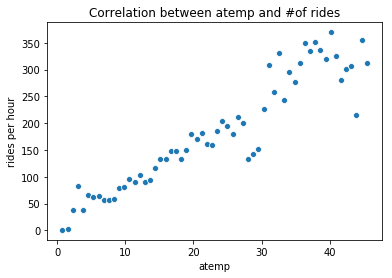

In [39]:
#creating scatterplot with atemp and hourly average number of rides
ax = sns.scatterplot(x=pivot_atemp_rides.atemp, y=pivot_atemp_rides['rides per hour']).set_title('Correlation between atemp and #of rides')

Overall there is a strong correlation between atemp and number of rides. As correlation is maily linear, we can standardize data. 

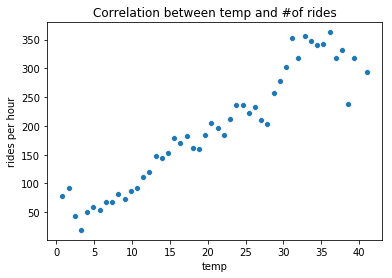

In [40]:
#creating pivot for total rides for each observed atemp
pivot_temp_rides = pd.pivot_table(df2,index=["temp"], values=["count"], aggfunc=sum)
pivot_temp_rides['number of hours']=pd.pivot_table(df2,index=["temp"], values=["count"], aggfunc="count")["count"]
pivot_temp_rides=pivot_temp_rides.rename(columns={'count':'total rides'})
pivot_temp_rides['rides per hour']=pivot_temp_rides["total rides"]/pivot_temp_rides["number of hours"]

pivot_temp_rides = pivot_temp_rides.reset_index()

#creating scatterplot with atemp and hourly average number of rides
ax = sns.scatterplot(x=pivot_temp_rides.temp, y=pivot_temp_rides['rides per hour']).set_title('Correlation between temp and #of rides')

# Hypothesis 5: humidity negatively affects number of rides

In [41]:
#create checkpoint
df3=df2.copy()

In [42]:
#creating pivot for total rides for each observed humidity %
pivot_humidity_rides = pd.pivot_table(df3, index=["humidity"], values=["count"], aggfunc=sum)
pivot_humidity_rides['number of hours']=pd.pivot_table(df3, index=["humidity"], values=["count"], aggfunc="count")["count"]
pivot_humidity_rides=pivot_humidity_rides.rename(columns={'count':'total rides'})
pivot_humidity_rides['rides per hour']=pivot_humidity_rides["total rides"]/pivot_humidity_rides["number of hours"]

In [43]:
#converting pivot to table
pivot_humidity_rides=pivot_humidity_rides.reset_index()

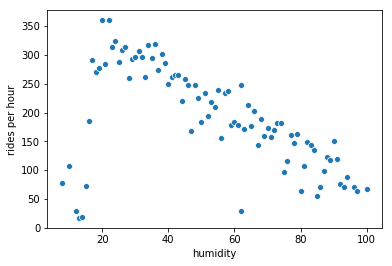

In [44]:
#creating scatterplot with humidity and hourly average number of rides
ax = sns.scatterplot(x=pivot_humidity_rides.humidity, y=pivot_humidity_rides['rides per hour'])

We observe that 1) From 0% to 20% the number of rides rides is substantially lower that across total sample; that can be explained by uncomfortably dry (probably hot) air 2) starting from 20% the number of rides starts to gradually fall with increase in humidity

# Hypothesis 6: windspeed affects number of rides

In [45]:
#creating pivot for total rides for each observed windspeed
pivot_windspeed_rides = pd.pivot_table(df3, index=["windspeed"], values=["count"], aggfunc=sum)
pivot_windspeed_rides['number of hours']=pd.pivot_table(df3, index=["windspeed"], values=["count"], aggfunc="count")["count"]
pivot_windspeed_rides=pivot_windspeed_rides.rename(columns={'count':'total rides'})
pivot_windspeed_rides['rides per hour']=pivot_windspeed_rides["total rides"]/pivot_windspeed_rides["number of hours"]

In [46]:
#converting pivot to table
pivot_windspeed_rides=pivot_windspeed_rides.reset_index()

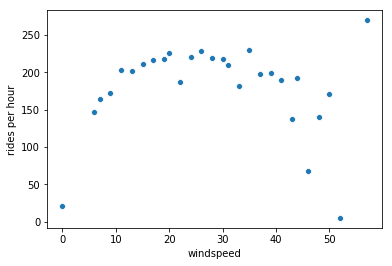

In [47]:
#creating scatterplot with humidity and hourly average number of rides
ax = sns.scatterplot(x=pivot_windspeed_rides.windspeed, y=pivot_windspeed_rides['rides per hour'])

From the observed chart we can break down windspeed into three groups: 0-10km/h (growing number of rides), 10-35km/h (number of rides at around 200 rides/hour), 35+km/h - number of hourly rides starts to fall

# Hypothesis 7: weather affects number of rides

In [48]:
#create pivot for average hourly number of rides for each weather
pivot_weather_rides = pd.pivot_table(df3, index=["weather"], values=["count"], aggfunc=sum)
pivot_weather_rides['number of hours']=pd.pivot_table(df3, index=["weather"], values=["count"], aggfunc="count")["count"]
pivot_weather_rides=pivot_weather_rides.rename(columns={'count':'total rides'})
pivot_weather_rides['rides per hour']=pivot_weather_rides["total rides"]/pivot_weather_rides["number of hours"]
pivot_weather_rides=pivot_weather_rides.reset_index()

In [49]:
pivot_weather_rides

,weather,total rides,number of hours,rides per hour
0,1,1476063,7192,205.236791
1,2,507160,2834,178.955540
2,3,102089,859,118.846333
3,4,164,1,164.000000


As expected, the better the weather, the more rides people take. The only outlier is weather 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog). That weather was recorded only for one hour and the number of rides was suprisingly at a high level. 

Weather 4 was recorded only once and the number of rides appears to be artificially high for such bad weather. As number of rides is closest to weather type 2, we will change the only entry of weather 4 to weather 2.

# Final preprocessing steps

In [51]:
#get info of final preprocessed data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
datetime           10886 non-null object
season             10886 non-null int64
holiday            10886 non-null int64
workingday         10886 non-null int64
weather            10886 non-null int64
temp               10886 non-null float64
atemp              10886 non-null float64
humidity           10886 non-null float64
windspeed          10886 non-null float64
casual             10886 non-null int64
registered         10886 non-null int64
count              10886 non-null int64
Date               10886 non-null datetime64[ns]
hour               10886 non-null int64
month              10886 non-null int64
season_sin         10886 non-null float64
season_cos         10886 non-null float64
hour_sin           10886 non-null float64
hour_cos           10886 non-null float64
month_sin          10886 non-null float64
month_cos          10886 non-null float64
Day of the week    10

In [52]:
#drop redundant columns
df3.drop(['Date', 'holiday', 'datetime', 'hour', 'month', 'Day of the week', 'season'], 1, inplace=True)

In [53]:
#sorting columns in an alphabetic order for future merge with test data
df3 = df3.reindex(sorted(df3.columns), axis=1)

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
atemp         10886 non-null float64
casual        10886 non-null int64
count         10886 non-null int64
day_cos       10886 non-null float64
day_sin       10886 non-null float64
hour_cos      10886 non-null float64
hour_sin      10886 non-null float64
humidity      10886 non-null float64
month_cos     10886 non-null float64
month_sin     10886 non-null float64
registered    10886 non-null int64
season_cos    10886 non-null float64
season_sin    10886 non-null float64
temp          10886 non-null float64
weather       10886 non-null int64
windspeed     10886 non-null float64
workingday    10886 non-null int64
dtypes: float64(12), int64(5)
memory usage: 1.4 MB


In [55]:
#saving preprocessed file
bike_sharing_train_data_processed=df3
bike_sharing_train_data_processed.to_csv("bike_sharing_train_data_processed.csv", index=False)

# Bringing test file to train format

In [56]:
test_data=pd.read_csv('bike_sharing_test.csv')

In [57]:
#convert date from type object to type datetime
test_data['Date']=pd.to_datetime(test_data['datetime'])

#extract hour and month
test_data['hour'] = test_data['Date'].dt.hour
test_data['month'] = test_data['Date'].dt.month

test_data["Day of the week"]=test_data['Date'].dt.weekday
test_data['day_sin'] = np.sin(test_data["Day of the week"]*(2.*np.pi/24))
test_data['day_cos'] = np.cos(test_data["Day of the week"]*(2.*np.pi/24))
test_data.drop(['Day of the week'], 1, inplace=True)

#adding the (sine, cosine) tansformation to season
test_data['season_sin'] = np.sin(test_data.season*(2.*np.pi/24))
test_data['season_cos'] = np.cos(test_data.season*(2.*np.pi/24))

test_data.drop(['season'], 1, inplace=True)

test_data.hour=pd.to_numeric(test_data.hour)
test_data.month=pd.to_numeric(test_data.month)

test_data['hour_sin'] = np.sin(test_data.hour*(2.*np.pi/24))
test_data['hour_cos'] = np.cos(test_data.hour*(2.*np.pi/24))

test_data['month_sin'] = np.sin(test_data.month*(2.*np.pi/24))
test_data['month_cos'] = np.cos(test_data.month*(2.*np.pi/24))


test_data.drop(['Date', 'holiday', 'datetime', 'hour', 'month'], 1, inplace=True)

In [58]:
#sorting columns in an alphabetic order
test_data = test_data.reindex(sorted(test_data.columns), axis=1)

In [60]:
#saving processed test file to csv
bike_sharing_test_data_processed=test_data
bike_sharing_test_data_processed.to_csv("bike_sharing_test_data_processed.csv", index=False)

# Combining test and train files

In [61]:
from sklearn.utils import shuffle

def get_combined_data():
    # reading train data
    train = pd.read_csv('bike_sharing_train_data_processed.csv')
    #train=shuffle(train)
    
    # reading test data
    test = pd.read_csv('bike_sharing_test_data_processed.csv')
    #test=shuffle(test)

    # extracting and then removing the targets from the training data   
    targets_registered = train.registered
    targets_casual=train.casual
    targets=train.count
    
    train.drop(['registered','casual','count'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index'], inplace=True, axis=1)
    
    return combined

In [62]:
combined = get_combined_data()

# Modelling

# Random Forest

In [63]:
targets_registered = pd.read_csv('bike_sharing_train_data_processed.csv', usecols=['registered'])['registered'].values
targets_casual = pd.read_csv('bike_sharing_train_data_processed.csv', usecols=['casual'])['casual'].values
targets = pd.read_csv('bike_sharing_train_data_processed.csv', usecols=['count'])['count'].values

train = combined.iloc[:10886]
test = combined.iloc[10886:]

In [64]:
targets_registered=np.log1p(targets_registered)
targets_casual=np.log1p(targets_casual)
targets=np.log1p(targets)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from datetime import datetime

In [66]:
#splitting train/test data for registered inputs
A_train, A_test, b_train, b_test = train_test_split(train, targets_registered, test_size=0.2)
print (A_train.shape, b_train.shape)
print (A_test.shape, b_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


In [67]:
#splitting train/test data for casual inputs
C_train, C_test, d_train, d_test = train_test_split(train, targets_casual, test_size=0.2)
print (C_train.shape, d_train.shape)
print (C_test.shape, d_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


In [68]:
clf_registered = RandomForestRegressor(
            n_estimators = 1500, 
            oob_score = 'True', 
            n_jobs = -1, 
            random_state=42,
            min_samples_leaf=2)

clf_casual = RandomForestRegressor(
            n_estimators = 1500, 
            oob_score = 'True', 
            n_jobs = -1, 
            random_state=42,
            min_samples_leaf=2)


model_registered = clf_registered.fit(A_train, b_train)
model_casual = clf_casual.fit(C_train, d_train)

predictions_casual=np.expm1(model_casual.predict(C_test))
predictions_registered=np.expm1(model_registered.predict(A_test))

score_reg=model_registered.score(A_test, b_test)
score_casual=model_casual.score(C_test, d_test)

score_reg_base=0.92338
score_casual_base=0.88857

print("Improvement of reg score over base: ", '{:f}'.format(score_reg-score_reg_base))
print("Improvement of casual score over casual: ", '{:f}'.format(score_casual-score_casual_base))

Improvement of reg score over base:  0.001321
Improvement of casual score over casual:  -0.002144


In [69]:
#model_registered = clf_registered.fit(train, targets_registered)
#model_casual = clf_casual.fit(train, targets_casual)

#predictions_casual=np.expm1(model_casual.predict(test))
#predictions_registered=np.expm1(model_registered.predict(test))

model = clf_casual.fit(train, targets)
predictions = np.expm1(model.predict(test))

In [70]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions
df_output[['datetime','count']].to_csv('bike_sharing_RF_log.csv', index=False)

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
model = clf.fit(train, targets)
predictions = np.expm1(model.predict(test))

In [80]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions
df_output[['datetime','count']].to_csv('bike_sharing_LR.csv', index=False)

In [ ]:
x

In [75]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(A_train, b_train)  

ValueError: Unknown label type: 'continuous'

In [71]:
x

NameError: name 'x' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
clf_casual = GradientBoostingRegressor(n_estimators=80, learning_rate = .05, max_depth = 10, min_samples_leaf = 20)
clf_registered = GradientBoostingRegressor(n_estimators=80, learning_rate = .05, max_depth = 10, min_samples_leaf = 20)

In [ ]:
model_registered = clf_registered.fit(train, targets_registered)
model_casual = clf_casual.fit(train, targets_casual)

In [ ]:
predictions_casual=np.expm1(clf_casual.predict(test))
predictions_registered=np.expm1(clf_registered.predict(test))

In [ ]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions_registered+predictions_casual
df_output[['datetime','count']].to_csv('bike_sharing_GBM.csv', index=False)

# Ensembling/Stacking

In [ ]:
x

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from statistics import mode

model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()
model3 = LinearRegression()

In [ ]:
model1.fit(train,targets)
model2.fit(train,targets)
model3.fit(train,targets)

pred1=model1.predict(test)
pred2=model2.predict(test)
pred3=model3.predict(test)

predictions = (pred1 + pred2 + pred3)/3

In [ ]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions
df_output[['datetime','count']].to_csv('bike_sharing_simple_averaging', index=False)

In [ ]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions
df_output[['datetime','count']].to_csv('bike_sharing_submission_XGb', index=False)

In [ ]:
d

# Keras DL

In [ ]:
# Importing Keras Sequential Model
import tensorflow as tf
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


# Define model
model = Sequential()
model.add(Dense(50, input_dim=11, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [ ]:
# Compile model
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
# Fit Model
model.fit(train, targets, epochs=15)

In [ ]:
predictions=model.predict(test)

In [ ]:
df_output = pd.DataFrame()
aux = pd.read_csv('bike_sharing_test.csv')
df_output['datetime'] = aux['datetime']
df_output['count'] = predictions
df_output[['datetime','count']].to_csv('bike_sharing_submission_keras1.csv', index=False)

In [ ]:
посмотреть тетрадь, применить каждый метод, negative values, normalization, dl model

# Naive Bayes

# Logistic Regression

# KNN

We have observed that weather variable brings little value to predictive power of the model and will drop it to reduce dimensionality

In [ ]:
# One Hot Encoding
features = pd.get_dummies(features)
# Extract features and labels
labels = features['actual']
features = features.drop('actual', axis = 1)
# List of features for later use
feature_list = list(features.columns)
# Convert to numpy arrays
import numpy as np
features = np.array(features)
labels = np.array(labels)
# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,                                          test_size = 0.25, random_state = 42)
We set a random seed (of course it has to be 42) to ensure consistent results across runs. Let’s quickly do a check of the sizes of each array to confirm everything is in order.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)